In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import ast
import linecache 
import sys
import pickle
sys.path.append("../..")
from federated_learning.helper import utils

In [6]:
def get_all_params_flattend(model_state):
    params = np.array([], dtype=np.float32)
    for ll_name, ll_data in model_state.items():
        params = np.concatenate((params, ll_data.reshape(-1)))
#     with torch.no_grad():
#         params = np.concatenate((params, model.conv1.weight.data.reshape(-1)))
#         params = np.concatenate((params, model.conv1.bias.data.reshape(-1)))
#         params = np.concatenate((params, model.conv2.weight.data.reshape(-1)))
#         params = np.concatenate((params, model.conv2.bias.data.reshape(-1)))
#         params = np.concatenate((params, model.fc1.weight.data.reshape(-1)))
#         params = np.concatenate((params, model.fc1.bias.data.reshape(-1)))
#         params = np.concatenate((params, model.fc2.weight.data.reshape(-1)))
#         params = np.concatenate((params, model.fc2.bias.data.reshape(-1)))
    return params

from sklearn.preprocessing import StandardScaler
def standardization(all_params):
    all_params = StandardScaler().fit_transform(all_params)
    return all_params

from sklearn.preprocessing import MinMaxScaler
def normalization(all_params):
    norm = MinMaxScaler().fit_transform(all_params)
    return all_params

from sklearn.decomposition import PCA
def draw_pca_model(params_list, colors, title):
    pca = PCA(n_components=2)
    proj = pca.fit_transform(params_list)
    figure = plt.figure(figsize=(18, 8))
    plt.title(title)
    plt.scatter(proj[:, 0], proj[:,1], c = colors, cmap="rainbow") #gist_rainbow
    for ii in range(len(proj)):
        label = ii if ii == len(proj) - 1 else ii
        plt.annotate(label, (proj[ii, 0], proj[ii, 1]), textcoords="offset points", xytext=(5+random.random(),5+random.random()))
#     plt.scatter(proj[:, 0], proj[:,1], c = colors, cmap="rainbow") #gist_rainbow
#     plt.annotate("W0", (proj[len(proj) - 2, 0], proj[len(proj) - 2, 1]), textcoords="offset points", xytext=(5,5))
#     plt.annotate("weighted_avg", (proj[len(proj) - 1, 0], proj[len(proj) - 1, 1]), textcoords="offset points", xytext=(5,5))
    plt.colorbar(ticks=range(len(params_list)))

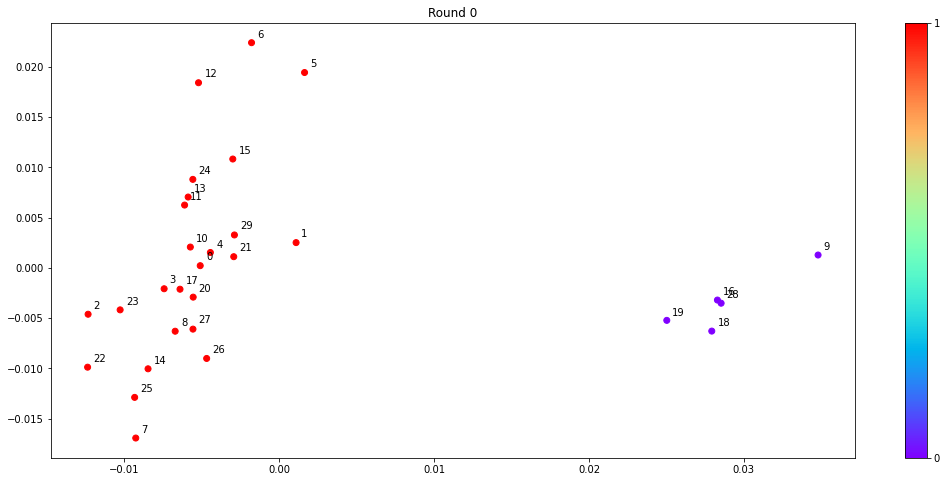

In [16]:
round_no = 0
type_name = "niid_np"

log_path = "../../data_output/20210225_195555_TTT_105"

all_params = np.array([], dtype=np.float32).reshape(-1, 431570) 
# 431570 is the nmber of all params in a model

line = linecache.getline("{}/{}".format(log_path, "selected_workers"), round_no + 1)
selected_workers = ast.literal_eval(line[line.index('['):])

attackers_idx = utils.load_object(log_path, "attackers")
attackers_num = len(attackers_idx)
workers_idx = ["worker_{}".format(ii) for ii in range(30)]
normal_idx = set(workers_idx) - set(attackers_idx)

color_map = []
for ww in selected_workers:
    if ww in attackers_idx:
        color_map.append(1.0)
    elif ww in normal_idx:
        color_map.append(0)

all_params = np.array([], dtype=np.float32).reshape(-1, 431080) 
# 431080 is the nmber of all params in a model
for ww in selected_workers:
    model_path = "{}/models/workers_R{}/{}_{}_{}_R{}".format(
        log_path, round_no,
        type_name, attackers_num, ww, round_no)
    params = get_all_params_flattend(torch.load(model_path)).reshape(1, -1)
    all_params = np.concatenate((all_params, params))

# all_params = normalization(all_params)
draw_pca_model(all_params, color_map, "Round {}".format(round_no))



In [17]:
# workers_idx = ["worker_{}".format(ii) for ii in range(30)]
# normal_idx = set(workers_idx) - set(attackers_idx)
normal_idx

{'worker_16', 'worker_18', 'worker_19', 'worker_28', 'worker_9'}